## <center> Forecasting Stock Market Rates through Machine Learning and Econometric Models <br><br> - Utkarsh Barsaiyan</center>

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [76]:
df_bse = pd.read_csv("BSE.csv")

In [77]:
df_bse.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-03,27943.039063,27969.820313,27785.400391,27860.380859,27860.380859,9500.0
1,2014-11-05,27907.189453,28010.390625,27857.650391,27915.880859,27915.880859,8700.0
2,2014-11-07,27902.710938,27980.929688,27739.560547,27868.630859,27868.630859,10500.0
3,2014-11-10,27919.449219,28027.960938,27764.750000,27874.730469,27874.730469,7900.0
4,2014-11-11,27911.250000,27996.919922,27790.400391,27910.060547,27910.060547,7000.0


In [78]:
df_bse.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2019-10-25,39201.671875,39241.609375,38718.269531,39058.058594,39058.058594,48600.0
1225,2019-10-29,39293.488281,39917.011719,39254.121094,39831.839844,39831.839844,50500.0
1226,2019-10-30,40055.628906,40178.121094,39805.109375,40051.871094,40051.871094,37200.0
1227,2019-10-31,40211.988281,40392.218750,40054.890625,40129.050781,40129.050781,8790000.0
1228,2019-11-01,40196.070313,40283.300781,40014.230469,40165.031250,40165.031250,57000.0


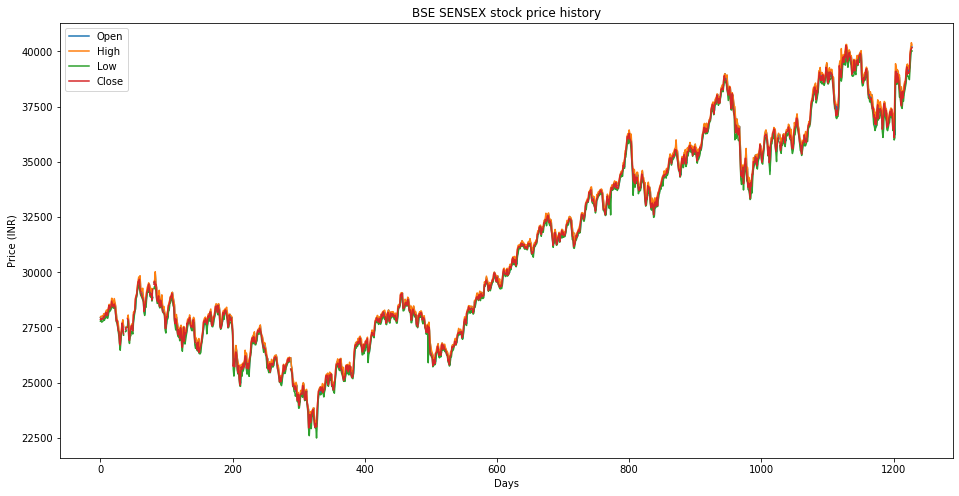

In [79]:
plt.figure(figsize=(16,8))
plt.plot(df_bse["Open"])
plt.plot(df_bse["High"])
plt.plot(df_bse["Low"])
plt.plot(df_bse["Close"])
plt.title('BSE SENSEX stock price history')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

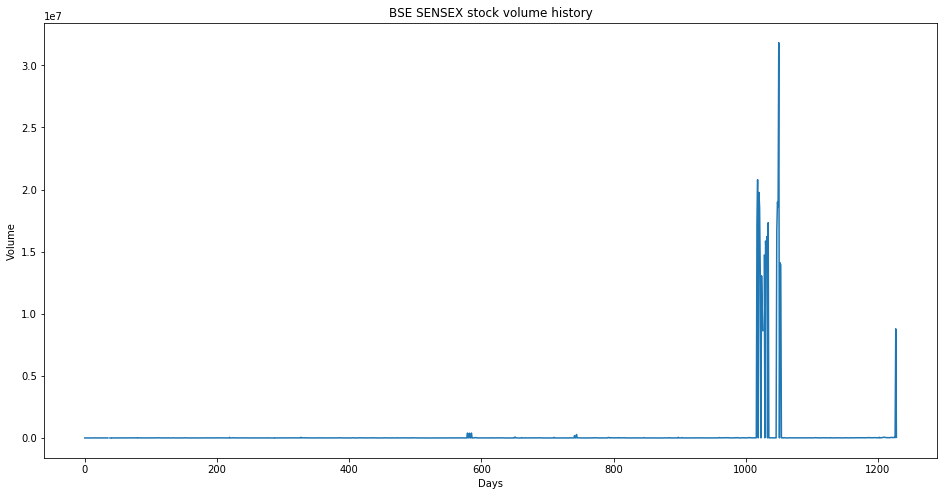

In [80]:
plt.figure(figsize=(16,8))
plt.plot(df_bse["Volume"])
plt.title('BSE SENSEX stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [81]:
print("checking if any null values are present\n", df_bse.isna().sum())

checking if any null values are present
 Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64


In [82]:
df_bse[df_bse.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
36,2014-12-26,NaN,NaN,NaN,NaN,NaN,NaN
37,2014-12-29,NaN,NaN,NaN,NaN,NaN,NaN
40,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
80,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
287,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1027,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_bse = df_bse.interpolate(method='linear', limit_direction='forward') 

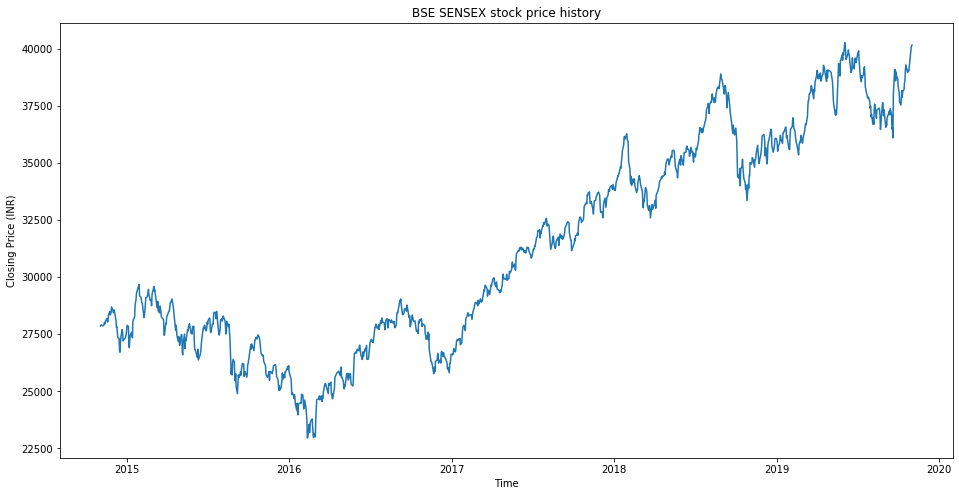

In [84]:
#setting index as date
df_bse['Date'] = pd.to_datetime(df_bse.Date,format='%Y-%m-%d')
df_bse.index = df_bse['Date']

#plot
plt.figure(figsize=(16,8))
plt.title('BSE SENSEX stock price history')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')
plt.plot(df_bse['Close'], label='Close Price history')

In [85]:
#split into 80% test and 20% train data
df_bse_train = df_bse[:982]
df_bse_test = df_bse[982:]

In [86]:
df_bse_train

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-11-03,2014-11-03,27943.039063,27969.820313,27785.400391,27860.380859,27860.380859,9500.0
2014-11-05,2014-11-05,27907.189453,28010.390625,27857.650391,27915.880859,27915.880859,8700.0
2014-11-07,2014-11-07,27902.710938,27980.929688,27739.560547,27868.630859,27868.630859,10500.0
2014-11-10,2014-11-10,27919.449219,28027.960938,27764.750000,27874.730469,27874.730469,7900.0
2014-11-11,2014-11-11,27911.250000,27996.919922,27790.400391,27910.060547,27910.060547,7000.0
...,...,...,...,...,...,...,...
2018-10-17,2018-10-17,35543.378906,35605.429688,34727.160156,34779.578125,34779.578125,17700.0
2018-10-19,2018-10-19,34563.289063,34563.289063,34140.320313,34315.628906,34315.628906,16000.0
2018-10-22,2018-10-22,34689.390625,34748.691406,34082.761719,34134.378906,34134.378906,17100.0


In [87]:
df_bse_test

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-10-25,2018-10-25,33778.601563,33838.761719,33553.179688,33690.089844,33690.089844,17400.0
2018-10-26,2018-10-26,33776.800781,33776.800781,33291.578125,33349.308594,33349.308594,21300.0
2018-10-29,2018-10-29,33549.878906,34154.601563,33341.800781,34067.398438,34067.398438,28000.0
2018-10-30,2018-10-30,34068.921875,34176.359375,33799.789063,33891.128906,33891.128906,15800.0
2018-10-31,2018-10-31,33963.089844,34463.378906,33587.238281,34442.050781,34442.050781,25900.0
...,...,...,...,...,...,...,...
2019-10-25,2019-10-25,39201.671875,39241.609375,38718.269531,39058.058594,39058.058594,48600.0
2019-10-29,2019-10-29,39293.488281,39917.011719,39254.121094,39831.839844,39831.839844,50500.0
2019-10-30,2019-10-30,40055.628906,40178.121094,39805.109375,40051.871094,40051.871094,37200.0


### Moving Average

In [88]:
preds = []
for i in range(0, df_bse_test.shape[0]):
    a = df_bse_train['Close'][i:].sum() + sum(preds)
    b = a/len(df_bse_train)
    preds.append(b)

In [89]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(df_bse_test['Close'])-preds),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
7661.131225886843


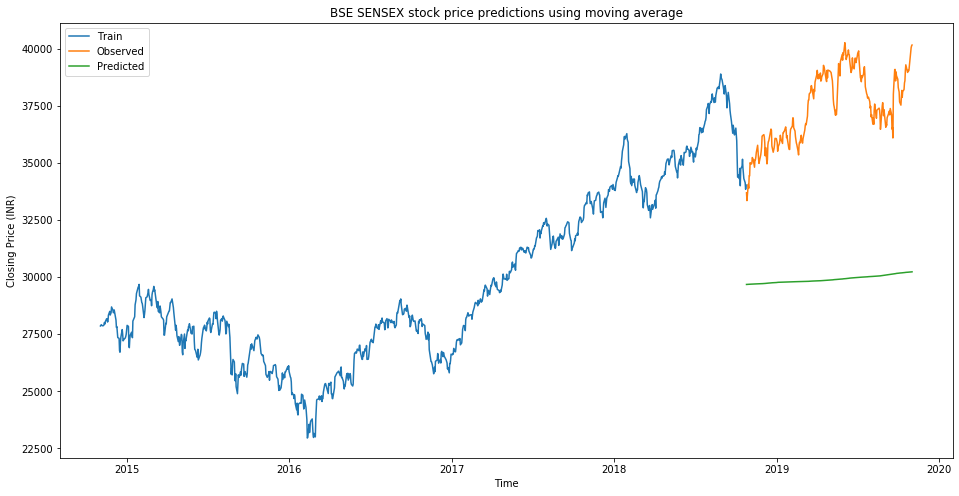

In [90]:
#plot
plt.figure(figsize=(16,8))
plt.title('BSE SENSEX stock price predictions using moving average')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')
df_bse_test = df_bse_test.assign(Predictions = 0)
df_bse_test = df_bse_test.assign(Predictions = preds)
plt.plot(df_bse_train['Close'])
plt.plot(df_bse_test[['Close', 'Predictions']])
plt.legend(['Train', 'Observed', 'Predicted'], loc='upper left')

### Seasonal ARIMA

In [72]:
from pmdarima.arima import auto_arima

training = df_bse_train['Close']
validation = df_bse_test['Close']

model = auto_arima(training, start_p=1, start_q=1, max_p=1, max_q=1, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = df_bse_test.index, columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=13481.263, BIC=13505.644, Fit time=8.699 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=14035.140, BIC=14044.893, Fit time=0.065 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=13790.009, BIC=13809.514, Fit time=2.403 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=13480.018, BIC=13499.523, Fit time=3.158 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=13478.876, BIC=13503.257, Fit time=4.230 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=13789.659, BIC=13809.164, Fit time=2.249 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=13483.526, BIC=13512.784, Fit time=30.876 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=14027.266, BIC=14041.895, Fit time=0.333 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=13478.381, BIC=13512.515, Fit time=34.434 seconds
Fit ARIM

In [73]:
#rms
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
2317.2723288481693


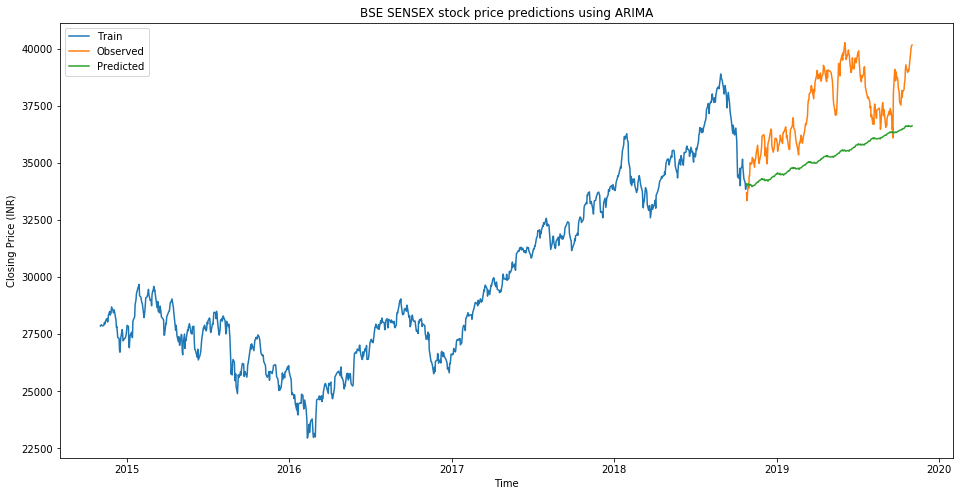

In [74]:
#plot
plt.figure(figsize=(16,8))
plt.title('BSE SENSEX stock price predictions using ARIMA')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')
plt.plot(df_bse_train['Close'])
plt.plot(df_bse_test['Close'])
plt.plot(forecast['Prediction'])
plt.legend(['Train', 'Observed', 'Predicted'], loc='upper left')

### fbprophet by Facebook

In [61]:
#importing prophet
from fbprophet import Prophet

In [62]:
train = df_bse_train[['Date', 'Close']]
valid = df_bse_test[['Date', 'Close']]

In [63]:
#preparing data
train = train.rename(columns={'Close': 'y', 'Date': 'ds'})
valid = valid.rename(columns={'Close': 'y', 'Date': 'ds'})

In [64]:
#fit the model
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(train)

In [65]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [66]:
#rmse
forecast_valid = forecast['yhat'][len(train):]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
2317.2723288481693


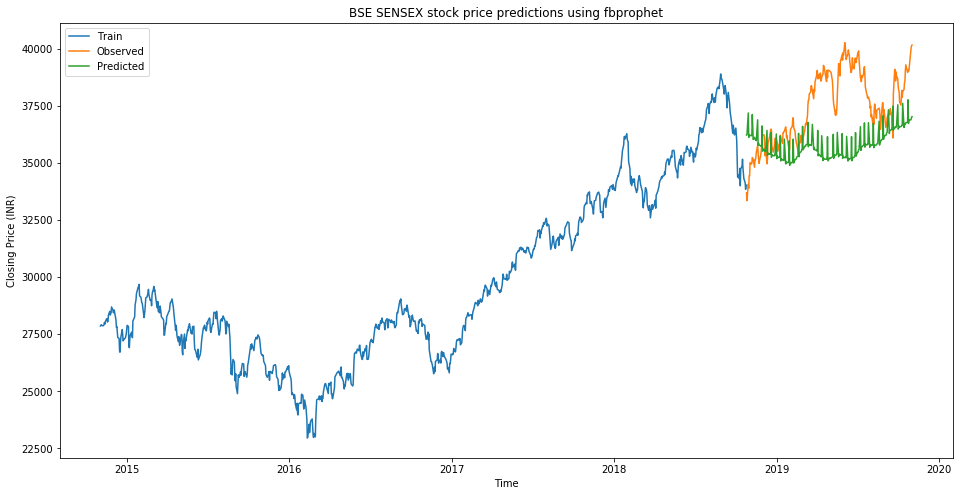

In [68]:
#plot
plt.figure(figsize=(16,8))
plt.title('BSE SENSEX stock price predictions using fbprophet')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = forecast_valid.values)
plt.plot(train['y'])
plt.plot(valid['y'])
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Observed', 'Predicted'], loc='upper left')

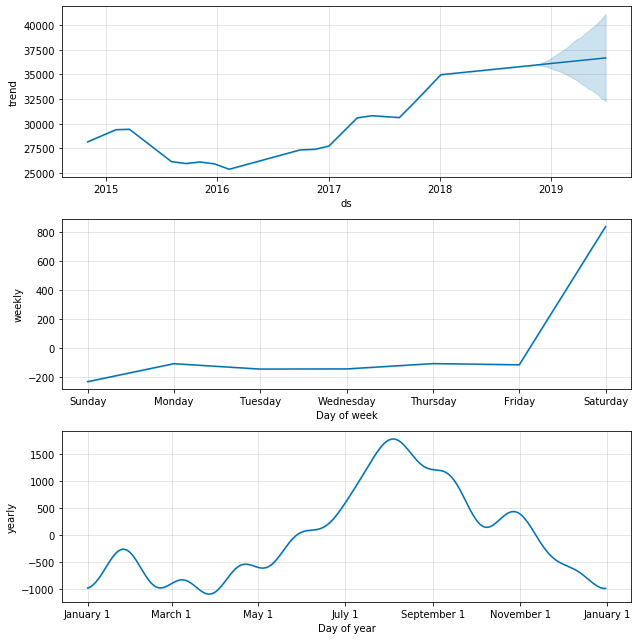

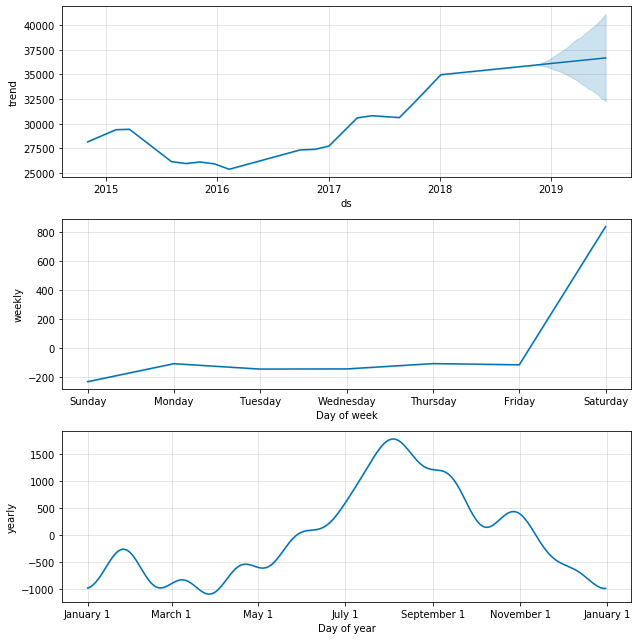

In [41]:
model.plot_components(forecast)

### Long Short-Term Memory (LSTM)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Using TensorFlow backend.


In [45]:
dataset = df_bse[['Close']]
train = df_bse_train[['Close']]
valid = df_bse_test[['Close']]
dataset = dataset.values
train = train.values
valid = valid.values

In [46]:
scaled_data = scaler.fit_transform(dataset)

In [47]:
past_values = 60
x_train, y_train = [], []
for i in range(past_values, len(train)):
    x_train.append(scaled_data[i-past_values:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [48]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [49]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 22s - loss: 0.0028
Epoch 2/5
 - 22s - loss: 0.0011
Epoch 3/5
 - 22s - loss: 9.5786e-04
Epoch 4/5
 - 22s - loss: 6.1525e-04
Epoch 5/5
 - 21s - loss: 5.0877e-04


In [50]:
#predicting validation data values, using past_values from the train data
inputs = dataset[len(dataset) - len(valid) - past_values:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [51]:
X_test = []
for i in range(past_values, inputs.shape[0]):
    X_test.append(inputs[i-past_values:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [52]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [53]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
599.9696700385325


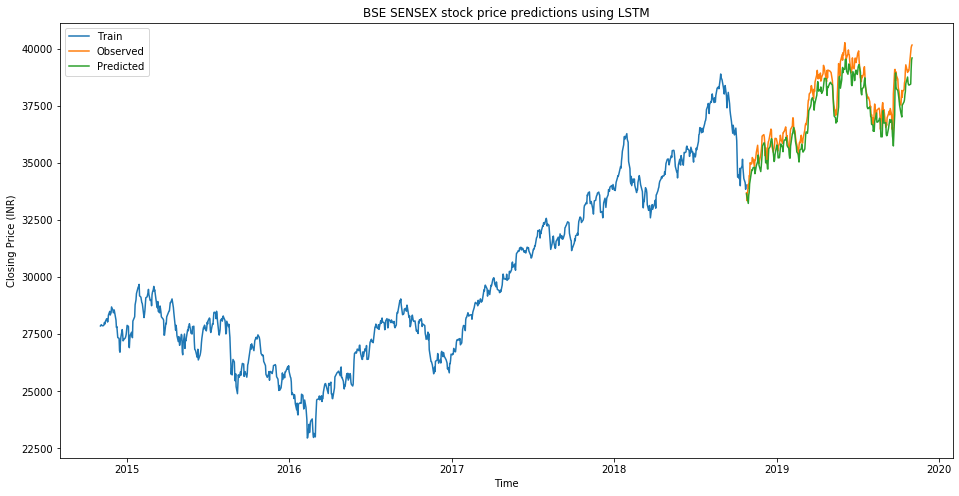

In [59]:
#plot
plt.figure(figsize=(16,8))
plt.title('BSE SENSEX stock price predictions using LSTM')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

train = df_bse_train[['Close']]
valid = df_bse_test[['Close']]
valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = closing_price)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Observed', 'Predicted'], loc='upper left')